# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [84]:
import pandas as pd
import numpy as np

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [85]:
# Your code to explore data and train a regression model
data.shape

(414, 7)

Can treat date data as discrete, there's no need to trans date to year and month!

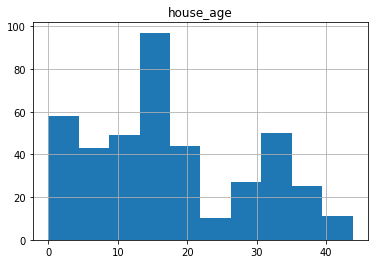

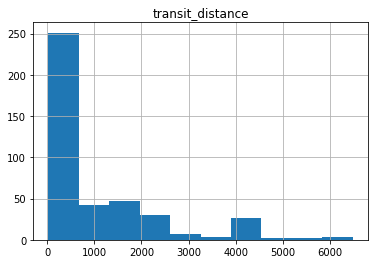

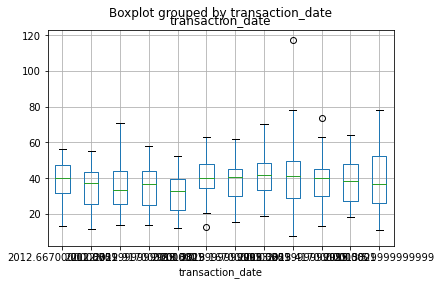

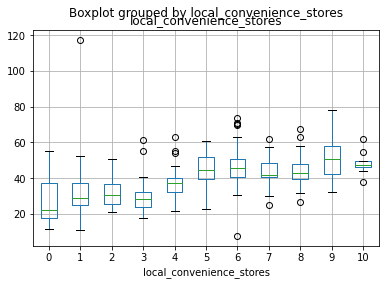

In [88]:
from matplotlib import pyplot as plt
numeric_features = ['house_age', 'transit_distance']
cate_features = ['transaction_date', 'local_convenience_stores']
for col in numeric_features:
    fig = plt.figure()
    ax = plt.gca()
    display(data[col].hist())
    ax.set_title(col)
    
for col in cate_features:
    fig = plt.figure()
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by=col, ax = ax)
    ax.set_title(col)

### check and delete outliers
As the plot can see the distribution of num feature are not norm, use boxplot to see more detail.


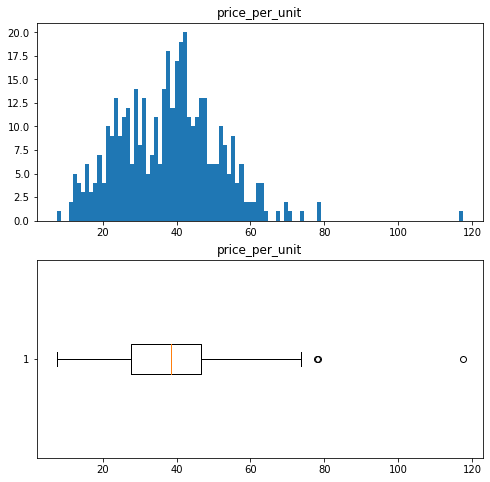

In [89]:
feature = data['price_per_unit']
fig, ax = plt.subplots(2,1,figsize = (8,8))
ax[0].hist(feature, bins = 100)
ax[0].set_title('price_per_unit')
ax[1].boxplot(feature, vert = False)
ax[1].set_title('price_per_unit')
plt.show()

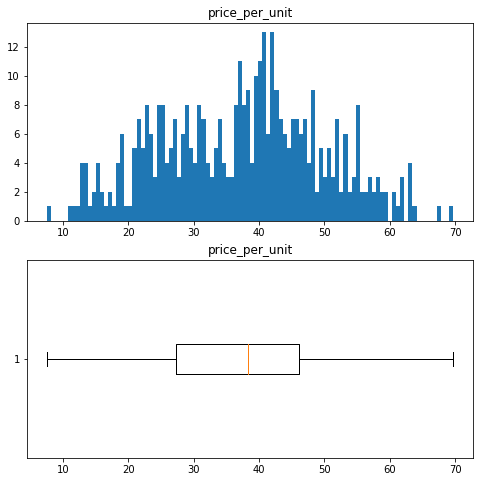

In [90]:
data = data[feature < 70]
feature = data['price_per_unit']
fig, ax = plt.subplots(2,1,figsize = (8,8))
ax[0].hist(feature, bins = 100)
ax[0].set_title('price_per_unit')
ax[1].boxplot(feature, vert = False)
ax[1].set_title('price_per_unit')
plt.show()

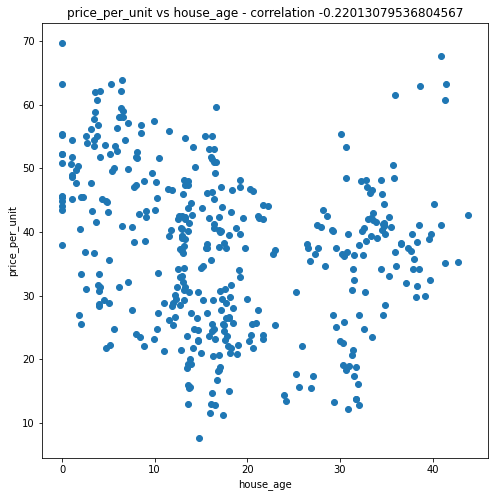

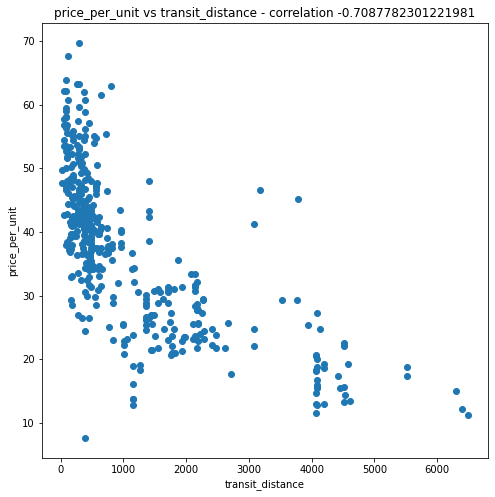

In [91]:
for col in numeric_features:
    fig = plt.figure(figsize = (8,8))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    corr = data[col].corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(col)
    plt.ylabel('price_per_unit')
    ax.set_title(f'price_per_unit vs {col} - correlation {corr}')
plt.show()

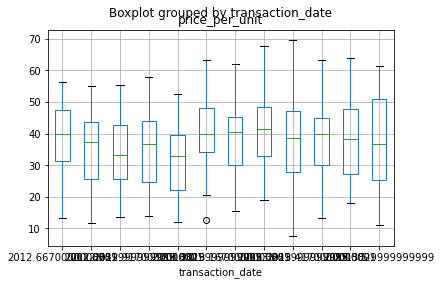

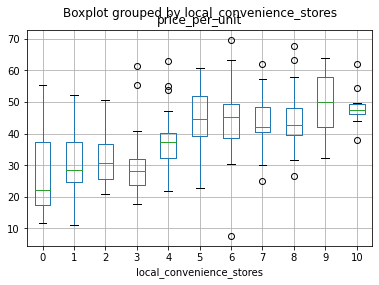

In [92]:
for col in cate_features:
    data.boxplot(column = 'price_per_unit', by=col)
plt.show()

In [94]:
X, y = data[['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']].values, data['price_per_unit'].values
print(f"X:{X[:10]}, y:{y[:10]}")

X:[[3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02]
 [1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02]
 [3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02]
 [2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02]
 [3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02]
 [1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02]], y:[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [95]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f"training set has {X_train.shape[0]} rows.\ntest set has {X_test.shape[0]}.")

training set has 285 rows.
test set has 123.


In [96]:
# making transformer pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
def data_trans(df):
    per_mon = 0.083
    df['year'] = df['transaction_date'].astype('int')
    df['year'] = df['year']-2012
    df['month'] = ((df['transaction_date']-df['year'])//per_mon).astype('int')
    df = df[['year', 'month', 'house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit']]
    return df

num_features = [1,2,3]
MM_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(
    transformers = [
        ('num', MM_transformer, num_features)])
LR_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('Linear', LinearRegression())
])
LR_pipeline.fit(X_train, y_train)

#LR Prediction
LR_prediction = LR_pipeline.predict(X_test)
LR_mse = mse(y_test, LR_prediction)
print(f"Linear Regression has RMSE:{np.sqrt(LR_mse)}")

Linear Regression has RMSE:7.604956004771413


In [97]:
#Try Random Forest
from sklearn.ensemble import RandomForestRegressor

RF_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('RandomForest', RandomForestRegressor(n_estimators = 500, random_state = 0))
])

#Fit RF model
RF_pipeline.fit(X_train, y_train)
#RF Prediction
RF_prediction = RF_pipeline.predict(X_test)
RF_mse = mse(y_test, RF_prediction)
print(f"Random Forest has RMSE:{np.sqrt(RF_mse)}")

Random Forest has RMSE:6.592091955485135


In [98]:
#Try Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('GradientBoost', GradientBoostingRegressor(random_state = 0))
])
GB_pipeline.fit(X_train, y_train)
GB_prediction = GB_pipeline.predict(X_test)
GB_mse = mse(y_test, GB_prediction)
print(f"Gradient Boosting has RMSE:{np.sqrt(GB_mse)}")

Gradient Boosting has RMSE:6.77821750409793


In [99]:
#Try Ada Boost
from sklearn.ensemble import AdaBoostRegressor
AB_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('AdaBoost', AdaBoostRegressor(n_estimators = 100, random_state = 0))
])
AB_pipeline.fit(X_train, y_train)
AB_prediction = AB_pipeline.predict(X_test)
AB_mse = mse(y_test, AB_prediction)
print(f"AdaBoost has RMSE:{np.sqrt(AB_mse)}")

AdaBoost has RMSE:7.2731656595291



## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [100]:
# Your code to use the trained model
X_new = [[16.2, 289.3248, 5, 24.98203, 121.54348], [13.6, 4082.015, 0, 24.94155, 121.50381]]

In [101]:
##Use lowest rmse model --> RF
new_prediction = RF_pipeline.predict(X_new)
new_prediction

array([49.91282229, 16.8561064 ])